In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import nltk

In [422]:
df = pd.read_csv('bfx_jobs_data_30_06_24.csv')

## EDA

In [423]:
df.head()

Job_title                  company_name  \
0    Research Scientist - Bioinformatics III*                 Cube Hub Inc.   
1                    Bioinformatics Scientist  Centrillion Technology, Inc.   
2         Single Cell Computational Biologist             Vevo Therapeutics   
3                        Scientist I/II - R&D          Eitr Biologics, Inc.   
4  Principal Scientist, Computational Biology          Genesis Therapeutics   

                    location   time_posted  num_applicants  \
0  California, United States  3 months ago            45.0   
1              Palo Alto, CA  2 months ago           187.0   
2    South San Francisco, CA   1 month ago           153.0   
3              San Diego, CA    1 week ago            96.0   
4              San Diego, CA  2 months ago             NaN   

                      seniority             employment  \
0              Mid-Senior level               Contract   
1              Mid-Senior level              Full-time   
2                Not Applicable              Full-time   
3              Mid-Senior level              Full-time   
4                Not Applicable              Full-time   

                                                      function  \
0                                                        Other   
1                Research, Analyst, and Information Technology   
2                Research, Analyst, and Information Technology   
3                                                     Research   
4                Research, Analyst, and Information Technology   

                                                                 industries  \
0                                                   Staffing and Recruiting   
1                                                    Biotechnology Research   
2                                                    Biotechnology Research   
3              Non-profit Organizations and Primary and Secondary Education   
4                       Transportation, Logistics, Supply Chain and Storage   

            salary  \
0              NaN   
1   $75,000.00/yr    
2  $120,000.00/yr    
3  $100,000.00/yr    
4              NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [424]:
df.shape

(3025, 11)

In [425]:
df.seniority.unique()

array(['            Mid-Senior level', '            Not Applicable',
       '            Entry level', nan, '            Associate',
       '            Internship', '            Executive',
       '            Director'], dtype=object)

In [426]:
df.function.unique(), df.function.nunique()

(array(['              Other',
        '              Research, Analyst, and Information Technology',
        '              Research', '              Science and Research',
        '              Information Technology', '              Science',
        '              Engineering and Information Technology', nan,
        '              Management and Manufacturing',
        '              Administrative',
        '              Education and Training',
        '              Training, Consulting, and Customer Service',
        '              Information Technology, Research, and Science',
        '              Research, Analyst, and Science',
        '              Research, Science, and Writing/Editing',
        '              Information Technology and Analyst',
        '              Sales and Business Development',
        '              Analyst',
        '              Strategy/Planning, Engineering, and Analyst',
        '              Information Technology and Engineering',
 

In [427]:
df.industries.unique(), df.industries.nunique()


(array(['            Staffing and Recruiting',
        '            Biotechnology Research',
        '            Non-profit Organizations and Primary and Secondary Education',
        '            Transportation, Logistics, Supply Chain and Storage',
        '            Hospitals and Health Care',
        '            Business Consulting and Services',
        '            Higher Education',
        '            Government Administration',
        '            Biotechnology Research and Research Services',
        '            Internet Publishing', nan,
        '            Technology, Information and Internet',
        '            Biotechnology Research and Health and Human Services',
        '            Research Services', '            Financial Services',
        '            Biotechnology',
        '            Pharmaceutical Manufacturing and Biotechnology Research',
        '            Pharmaceutical Manufacturing',
        '            IT Services and IT Consulting',
      

In [428]:
pd.set_option('display.max_colwidth', None)

In [429]:
df_desc = df['description'].head(5)
print(df_desc.head())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Cleaning description column

In [430]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')


### Clean HTML tags and special characters then lemmatize words in the description column


In [344]:

# Clean HTML tags and special characters
def clean_text(text):
    if isinstance(text, str):
        # Preserve sequences like "scrna-seq", "atac-seq", "scRNA-seq", etc.
        seq_patterns = re.findall(r'\b[a-zA-Z]+-seq\b', text)
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove non-alphanumeric characters except spaces, 'R', and specific punctuation marks
        text = re.sub(r'[^a-zA-Z0-9\sR.,;:-]', '', text)
        
        # Append preserved patterns (if any) to the cleaned text
        for pattern in seq_patterns:
            text += f" {pattern}"
        
        # Remove leading and trailing spaces
        text = text.strip()
    else:
        text = ''
    return text


df['cleaned_description'] = df['description'].apply(clean_text)

# insert space after punctuation the remove non-alphanumeric characters
def insert_space_after_punctuation(text):
    text = re.sub(r'(\.)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\,)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\;)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\:)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'[^a-zA-Z0-9\sR]', '', text)
    return text

df['cleaned_description'] = df['cleaned_description'].apply(insert_space_after_punctuation)

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return words

df['tokens'] = df['cleaned_description'].apply(tokenize_and_remove_stopwords)

# Lemmatize words
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_words)

# Convert tokens back to string
def tokens_to_string(tokens):
    return ' '.join(tokens)

df['final_cleaned_description'] = df['lemmatized_tokens'].apply(tokens_to_string)



In [431]:

# Clean HTML tags and special characters# Define a list of specific -seq patterns to preserve
seq_types = ['scrna-seq', 'atac-seq', 'rna-seq', 'chip-seq']  # Add more patterns as needed

def clean_text(text):
    if isinstance(text, str):
        # Create a regex pattern from the list of seq_types
        seq_pattern = '|'.join(re.escape(seq) for seq in seq_types)
        
        # Preserve sequences like "scrna-seq", "atac-seq", etc.
        seq_matches = re.findall(seq_pattern, text, re.IGNORECASE)
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove non-alphanumeric characters except spaces and specific punctuation
        text = re.sub(r'[^a-zA-Z0-9\sR.,;:-]', '', text)
        
        # Remove the preserved sequences to reinsert them later
        text = re.sub(seq_pattern, '', text, flags=re.IGNORECASE)
        
        # Reinsert preserved "-seq" patterns
        text += ' ' + ' '.join(seq_matches)
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = ''
    return text

df['cleaned_description'] = df['description'].apply(clean_text)

def insert_space_after_punctuation(text):
    seq_pattern = '|'.join(re.escape(seq) for seq in seq_types)
    seq_matches = re.findall(seq_pattern, text, re.IGNORECASE)
    text = re.sub(seq_pattern, '<SEQ>', text, flags=re.IGNORECASE)
    text = re.sub(r'(\.)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\,)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\;)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'(\:)([A-Za-z])', r'\1 \2', text)
    text = re.sub(r'[^a-zA-Z0-9\sR]', '', text)
    for match in seq_matches:
        text = re.sub('<SEQ>', match, text, 1)
    return text

df['cleaned_description'] = df['cleaned_description'].apply(insert_space_after_punctuation)

stop_words = set(stopwords.words('english'))
def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return words

df['tokens'] = df['cleaned_description'].apply(tokenize_and_remove_stopwords)

lemmatizer = WordNetLemmatizer()
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_words)

def tokens_to_string(tokens):
    return ' '.join(tokens)

df['final_cleaned_description'] = df['lemmatized_tokens'].apply(tokens_to_string)

### Check for skills, tools and technologies and academic qualifications in the job descriptions


In [432]:


# Updated lists of tools, technologies, skills, and qualifications
tools_technologies = [
    "Microsoft Office", "Microsoft Suite", "Excel", "Python", "Perl", "HTML", "R", "SharePoint", "bash", "SQL", "mssql", "mysql", "PowerBI", "Power BI",
    "Tableau", "SPSS", "Matlab", "SAS", "Teams", "Rservers", "Rshiny", "RMarkdown", "VBA", "Visual Basic for Applications",
    "KEGG", "Reactome", "PDB", "Shiny", "Unix", "Scrum", "Kanban",
    "Java", "C++", "JavaScript", "Docker", "Conda", "Git", "GitHub",
    "Hamilton Star", "Beckman Echo", "AWS", "GCP", "Azure",
    "CRISPR", "RNA-Seq", "ChIP-Seq", "ATAC-Seq", "scRNA-Seq", "Hi-C", "STAR",
    "WGS", "NGS", "RNA-Seq", "Bulk Sequencing", "Single Cell Sequencing", "BS-Seq", "Epigenetics",
    "Machine Learning", "ML", "Artificial Intelligence", "Deep Learning", "CNN", "Convolutional Neural Network", "Perturb-Seq", "Imaging", "AI",
    "Wet Lab", "Dry Lab", "Wet and Dry Lab", "Research", "Sequencing",
    "REST API", "TCGA", "DepMap", "gnomAD", "NCBI SRA", "ENCODE"
]

skills = [
    "Machine Learning", "ML", "Artificial Intelligence", "Deep Learning", "CNN", "Convolutional Neural Network", "Perturb-Seq", "Imaging", "AI",
    "Wet Lab", "Dry Lab", "Wet and Dry Lab", "Research", "Sequencing",
    "CRISPR", "Perturb-Seq", "Database", "Databases",
    "Bioinformatics", "Statistical Analyses", "Data Science", "Data Analytics", "Data Analysis", "Data Visualization",
    'Python', 'R', 'Java', 'C++', 'JavaScript'
]

qualifications = [
    "BSc", "bsc", "bachelor's", "bachelors", "msc", "MSc", "M.S", "M.S.", "M.Sc", "MSc", 
    "PhD", "Ph.D", "p.hd", "ph.d", "undergraduate", "masters", "master's", "master", "doctorate", "doctoral", "postdoc", "post-doc"
]

# Mappings for standardizing terms
tools_mapping = {
    "vba": "VBA",
    "visual basic for applications": "VBA",
    "power bi": "Power BI",
    "powerbi": "Power BI",
    "sql": "SQL",
    "mssql": "SQL",
    "mysql": "SQL",
    "microsoft suite": "Microsoft Office"
}

skills_mapping = {
    "data analysis": "Data Analysis",
    "data analytics": "Data Analysis",
    "database": "Databases",
    "databases": "Databases",
    "convolutional neural network": "CNN",
    "artificial intelligence": "AI"
}

qualification_mapping = {
    "bsc": "Bachelor's",
    "bachelor's": "Bachelor's",
    "bachelors": "Bachelor's",
    "msc": "Master's",
    "m.s": "Master's",
    "m.s.": "Master's",
    "m.sc": "Master's",
    "masters": "Master's",
    "master's": "Master's",
    "master": "Master's",
    "phd": "Doctorate",
    "ph.d": "Doctorate",
    "p.hd": "Doctorate",
    "ph.d.": "Doctorate",
    "doctorate": "Post Doctorate",
    "doctoral": "Post Doctorate",
    "postdoc": "Post Doctorate",
    "post-doc": "Post Doctorate",
    "undergraduate": "Undergraduate"
}

# Functions to check for tools, skills, and qualifications
def check_for_terms(text, terms):
    """ Generic function to check for any set of terms in a text """
    if isinstance(text, str):
        text = text.lower()
        found_terms = []
        for term in terms:
            if term.lower() in text:
                found_terms.append(term)
        return found_terms
    else:
        return []

# Functions to standardize tools, skills, and qualifications
def standardize_terms(term_list, mapping):
    return [mapping.get(term.lower(), term) for term in term_list]

# Apply the functions to the cleaned descriptions
df['tools_found'] = df['final_cleaned_description'].apply(lambda x: check_for_terms(x, tools_technologies))
df['tools_found'] = df['tools_found'].apply(lambda x: standardize_terms(x, tools_mapping))

df['skills_found'] = df['final_cleaned_description'].apply(lambda x: check_for_terms(x, skills))
df['skills_found'] = df['skills_found'].apply(lambda x: standardize_terms(x, skills_mapping))

df['academic_qualification'] = df['description'].apply(lambda x: check_for_terms(x, qualifications))
df['academic_qualification'] = df['academic_qualification'].apply(lambda x: standardize_terms(x, qualification_mapping))

# Ensure there are no unnecessary steps that remove words needed for counting later
# Your colleague's previous steps are effectively integrated and simplified


In [433]:

# Display the dataframe with the new column
df[['final_cleaned_description', 'tools_found', 'skills_found', 'academic_qualification']].head()


# Display the final cleaned descriptions
# print(df['final_cleaned_description'].head())


final_cleaned_description  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        DescriptionResearch Scientist Bioinformatics Consultant Molecular EpidemiologyThe Biomarker Sciences department client dedicated conduct biomarker translational research understanding specific aspect biology inform research development pipeline decision advance effectiveness available therapy appropriate patient population Molecular Epidemiology team support biomarker activity integrating realworld data epidemiologic evidence within biomarker discovery development strategy Responsibilities Responsibilities include limited following conduct statistical analysis realworld observational clinicogenomic data Tempus 

In [434]:
# Define categories for tools and skills
categories = {
    "Programming Languages": [
        "Python", "R", "Java", "C++", "Javascript", "bash", "SQL", "Perl", "HTML",
    ],
    "Cloud Platforms": [
        "AWS", "GCP", "Azure"
    ],
    "Data Visualization": [
        "Power BI", "Tableau", "SPSS"
    ],
    "Sequencing Technologies": [
        "RNA-seq", "ChIP-seq", "ATAC-seq", "scRNA-seq", "WGS", "Bulk Sequencing", "Single Cell Sequencing"
    ],
    "Machine Learning & AI": [
        "Machine Learning", "Deep Learning", "AI", "CNN"
    ],
    "Bioinformatics": [
        "CRISPR", "Perturb-Seq", "Imaging", "REST API"
    ],
    "Databases": [
        "TCGA", "DepMap", "gnomAD", "NCBI SRA", "ENCODE", "SQL"
    ],
    "Other Tools": [
        "Microsoft Office", "Excel", "SharePoint", "Teams", "Rservers", "Rshiny", "RMarkdown", "VBA",
        "KEGG", "Reactome", "PDB", "Shiny", "Unix", "Hamilton Star", "Beckman Echo", "Scrum", "Kanban",
        "Docker", "Conda", "Git", "GitHub"
    ]
}

# Function to categorize tools and skills
def categorize_tools(tools_found, categories):
    # Initialize category counts to zero
    categorized = {category: 0 for category in categories.keys()}
    
    # Iterate over each category and its items
    for category, items in categories.items():
        # Iterate over each item in the tools_found list
        for tool in tools_found:
            # If the tool is found in the category list, increment the count
            if tool in items:
                categorized[category] += 1
    
    return categorized

# Apply the categorization function to each job description
categorized_df = df['tools_found'].apply(lambda x: categorize_tools(x, categories))

# Convert the list of dictionaries into a DataFrame
categorized_df = pd.DataFrame(categorized_df.tolist())

# Concatenate the categorized DataFrame with the original DataFrame
df_final = pd.concat([df, categorized_df], axis=1)

# Optionally, you can save or view the resulting DataFrame
# df_final.to_csv('categorized_job_descriptions.csv', index=False)
df_final.head()



,Job_title,company_name,location,time_posted,num_applicants,seniority,employment,function,industries,salary,...,skills_found,academic_qualification,Programming Languages,Cloud Platforms,Data Visualization,Sequencing Technologies,Machine Learning & AI,Bioinformatics,Databases,Other Tools
0,Research Scientist - Bioinformatics III*,Cube Hub Inc.,"California, United States",3 months ago,45.0,Mid-Senior level,Contract,Other,Staffing and Recruiting,NaN,...,"[Machine Learning, AI, Research, Databases, Bioinformatics, Data Science, Python, R]","[Doctorate, Doctorate, Doctorate, Master's, Post Doctorate]",2,0,0,0,2,0,1,0
1,Bioinformatics Scientist,"Centrillion Technology, Inc.","Palo Alto, CA",2 months ago,187.0,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Biotechnology Research,"$75,000.00/yr",...,"[AI, AI, Research, Sequencing, Databases, Bioinformatics, Data Analysis, Python, R]",[],2,0,0,0,1,0,0,1
2,Single Cell Computational Biologist,Vevo Therapeutics,"South San Francisco, CA",1 month ago,153.0,Not Applicable,Full-time,"Research, Analyst, and Information Technology",Biotechnology Research,"$120,000.00/yr",...,"[Machine Learning, ML, AI, Sequencing, Bioinformatics, Data Analysis, Python, R]",[Doctorate],2,0,0,0,2,0,0,0
3,Scientist I/II - R&D,"Eitr Biologics, Inc.","San Diego, CA",1 week ago,96.0,Mid-Senior level,Full-time,Research,Non-profit Organizations and Primary and Secondary Education,"$100,000.00/yr",...,"[AI, Research, Sequencing, Bioinformatics, Data Analysis, R]","[Bachelor's, Doctorate, Doctorate, Master's, Master's]",1,0,0,0,1,0,0,0
4,"Principal Scientist, Computational Biology",Genesis Therapeutics,"San Diego, CA",2 months ago,NaN,Not Applicable,Full-time,"Research, Analyst, and Information Technology","Transportation, Logistics, Supply Chain and Storage",NaN,...,"[Machine Learning, ML, AI, Deep Learning, AI, Research, Sequencing, Databases, Databases, Bioinformatics, Data Visualization, R]",[Doctorate],1,0,0,0,3,0,0,1


In [435]:
# df_final = df.copy()

In [436]:
df.columns

Index(['Job_title', 'company_name', 'location', 'time_posted',
       'num_applicants', 'seniority', 'employment', 'function', 'industries',
       'salary', 'description', 'cleaned_description', 'tokens',
       'lemmatized_tokens', 'final_cleaned_description', 'tools_found',
       'skills_found', 'academic_qualification'],
      dtype='object')

In [437]:
df_final.columns

Index(['Job_title', 'company_name', 'location', 'time_posted',
       'num_applicants', 'seniority', 'employment', 'function', 'industries',
       'salary', 'description', 'cleaned_description', 'tokens',
       'lemmatized_tokens', 'final_cleaned_description', 'tools_found',
       'skills_found', 'academic_qualification', 'Programming Languages',
       'Cloud Platforms', 'Data Visualization', 'Sequencing Technologies',
       'Machine Learning & AI', 'Bioinformatics', 'Databases', 'Other Tools'],
      dtype='object')

In [438]:
df_final.describe()

,num_applicants,Programming Languages,Cloud Platforms,Data Visualization,Sequencing Technologies,Machine Learning & AI,Bioinformatics,Databases,Other Tools
count,1022.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.00000,3025.000000,3025.000000
mean,71.214286,1.310413,0.118347,0.027769,0.018843,1.038347,0.11405,0.074711,0.912727
std,44.090638,0.843886,0.410523,0.192164,0.145394,0.582923,0.33514,0.301624,0.856225
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,36.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,92.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,198.000000,8.000000,3.000000,2.000000,2.000000,4.000000,2.00000,3.000000,8.000000


## Visuals

### Style guide

In [439]:
# Set the theme for seaborn
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette=['#27ae61'],
    font_scale=1.2,
    rc={
        'axes.titlesize': 25,
        'axes.labelsize': 15,
        'xtick.labelsize': 13,
        'ytick.labelsize': 13,
        "axes.spines.right": False,
        "axes.spines.top": False,
        # "axes.spines.left": False,
         "figure.subplot.top": 0.9
    }
)


In [440]:
# Function to annotate bars
def annotate_bars(ax, orient='v', space=0.5, rotation=0, color='black', fmt='{:.2f}', fontsize=10):
    for p in ax.patches:
        if orient == 'v':  # Vertical bars
            value = p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = value + space
            ha, va = 'center', 'bottom'
        else:  # Horizontal bars
            value = p.get_width()
            x = value + space
            y = p.get_y() + p.get_height() / 2
            ha, va = 'left', 'center'

        # Only annotate if value is finite
        if np.isfinite(value):
            ax.text(x, y, fmt.format(value), ha=ha, va=va, rotation=rotation, color=color, fontsize=fontsize)

### Plots

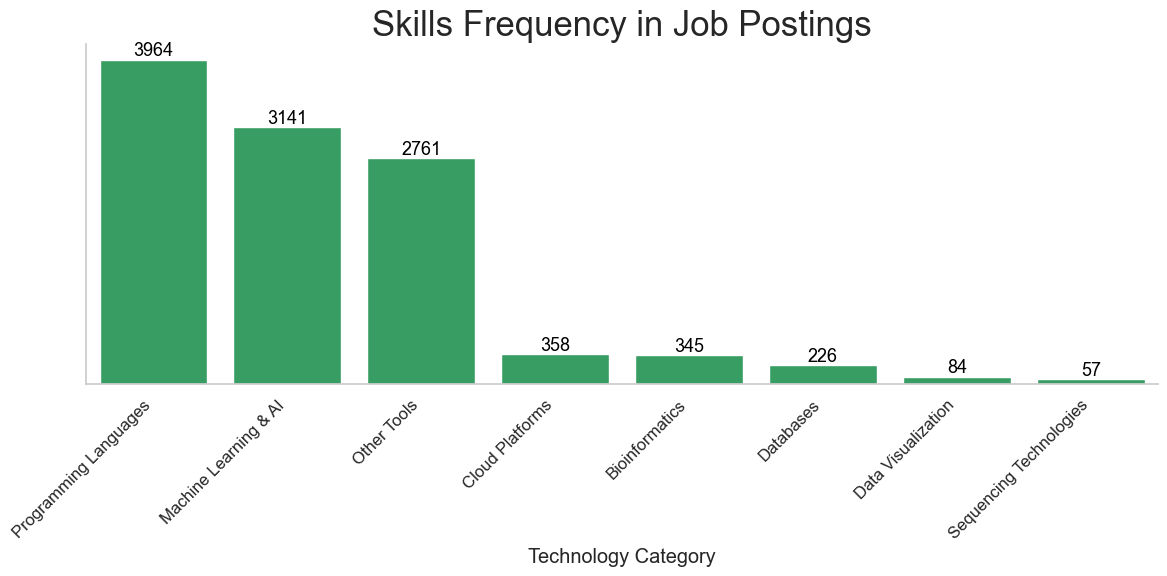

In [441]:
# Aggregate counts for each technology category
category_counts = df_final.sum(numeric_only=True).drop('num_applicants').sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='#27ae61')
plt.xticks(rotation=45, ha='right')
plt.title('Skills Frequency in Job Postings')
plt.xlabel('Technology Category')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

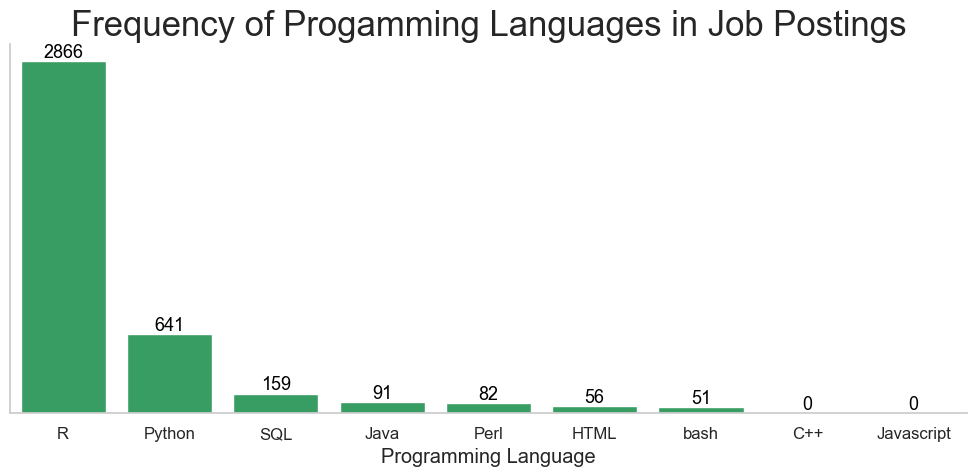

In [442]:
# List of specific programming languages to check
specific_languages = ['Python', 'R', 'Java', 'C++', 'Javascript', 'bash', "SQL", "Perl", "HTML",]

# Initialize a dictionary to store the counts
language_counts = {lang: 0 for lang in specific_languages}

# Count the mentions of each specific programming language
for lang in specific_languages:
    # Check if the language is mentioned in each job description
    language_counts[lang] = df_final['tools_found'].apply(lambda tools: lang in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_language_counts = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted languages and their counts
languages, counts = zip(*sorted_language_counts)

# Create a bar plot for specific programming languages
plt.figure(figsize=(10, 5))
sns.barplot(x=list(languages), y=list(counts), color='#27ae61')
plt.title('Frequency of Progamming Languages in Job Postings')
plt.xlabel('Programming Language')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

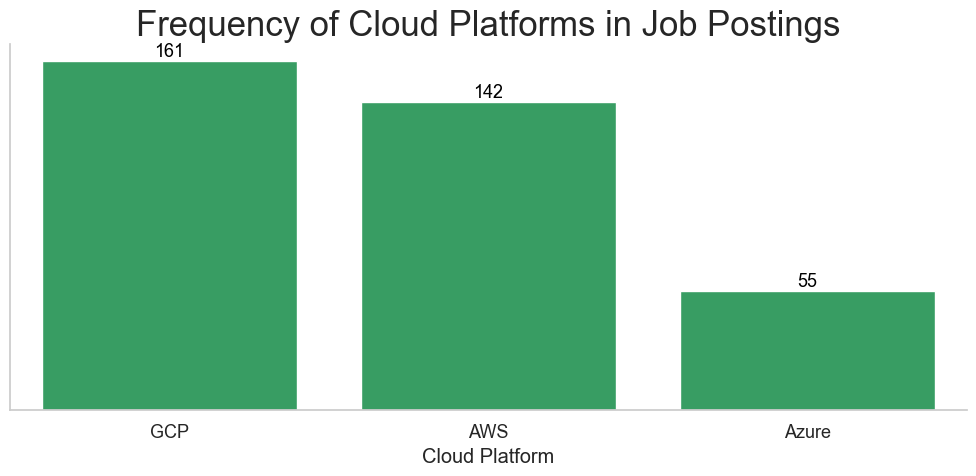

In [443]:
# List of specific programming languages to check
cloud_platforms = ["AWS", "GCP", "Azure"]


# Initialize a dictionary to store the counts
platform_counts = {platform: 0 for platform in cloud_platforms}

# Count the mentions of each specific programming language
for platform in cloud_platforms:
    # Check if the language is mentioned in each job description
    platform_counts[platform] = df_final['tools_found'].apply(lambda tools: platform in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_platform_counts = sorted(platform_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted languages and their counts
platforms, counts = zip(*sorted_platform_counts)

# Create a bar plot for specific programming languages
plt.figure(figsize=(10, 5))
sns.barplot(x=list(platforms), y=list(counts), color='#27ae61')
plt.title('Frequency of Cloud Platforms in Job Postings')
plt.xlabel('Cloud Platform')
plt.ylabel('')
plt.yticks([])
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

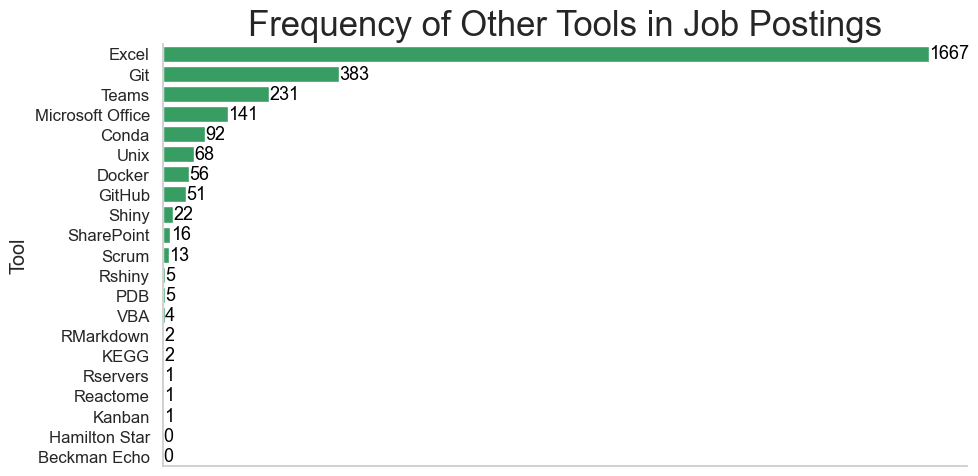

In [444]:
# List of specific programming languages to check
other_tools = ["Microsoft Office", "Excel", "SharePoint", "Teams", "Rservers", "Rshiny", "RMarkdown", "VBA",
        "KEGG", "Reactome", "PDB", "Shiny", "Unix", "Hamilton Star", "Beckman Echo", "Scrum", "Kanban", "Docker", "Conda", "Git", "GitHub"]


# Initialize a dictionary to store the counts
other_tools_counts = {_tools: 0 for _tools in other_tools}

# Count the mentions of each specific programming language
for _tools in other_tools:
    # Check if the language is mentioned in each job description
    other_tools_counts[_tools] = df_final['tools_found'].apply(lambda tools: _tools in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_other_tools_counts = sorted(other_tools_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted languages and their counts
_tools, counts = zip(*sorted_other_tools_counts)

# Create a bar plot for specific programming languages
plt.figure(figsize=(10, 5))
sns.barplot(y=list(_tools), x=list(counts), color='#27ae61')
plt.title('Frequency of Other Tools in Job Postings')
plt.ylabel('Tool')
plt.xlabel('')
plt.xticks([])
plt.yticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='h', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

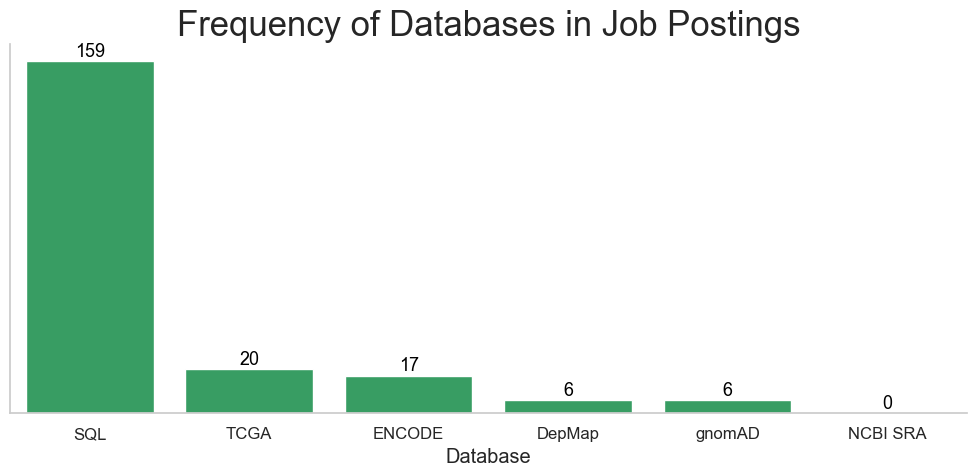

In [445]:
# List of specific programming languages to check
databases = ["TCGA", "DepMap", "gnomAD", "NCBI SRA", "ENCODE"]

# Initialize a dictionary to store the counts
databases_counts = {database: 0 for database in databases}

# Count the mentions of each specific programming language
for database in databases:
    # Check if the language is mentioned in each job description
    databases_counts[database] = df_final['tools_found'].apply(lambda tools: database in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
databases_counts = sorted(databases_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted languages and their counts
database, counts = zip(*databases_counts)

# Create a bar plot for specific programming languages
plt.figure(figsize=(10, 5))
sns.barplot(x=list(database), y=list(counts), color='#27ae61')
plt.title('Frequency of Databases in Job Postings')
plt.xlabel('Database')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

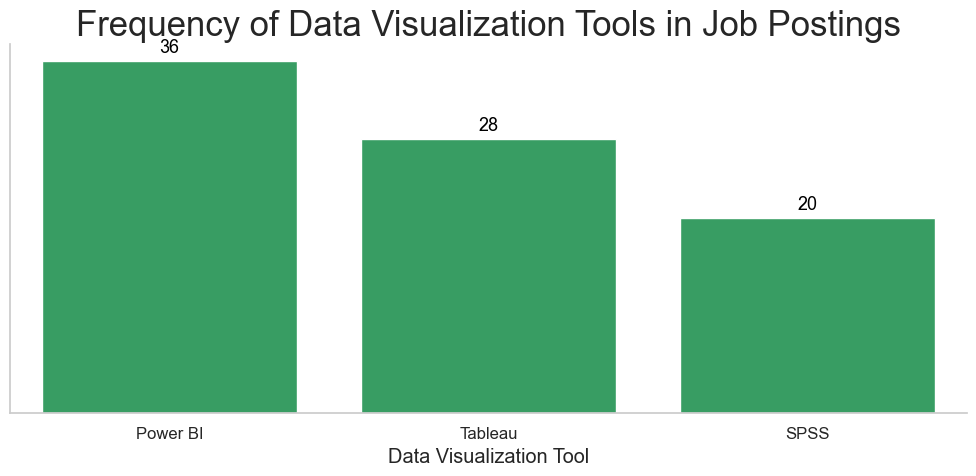

In [446]:
# List of specific data visualization tools to check
data_viz_tools = ["Power BI", "Tableau", "SPSS"]

# Initialize a dictionary to store the counts
data_viz_counts = {tool: 0 for tool in data_viz_tools}

# Count the mentions of each data visualization tool
for tool in data_viz_tools:
    # Check if the tool is mentioned in each job description
    data_viz_counts[tool] = df_final['tools_found'].apply(lambda tools: tool in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_data_viz_counts = sorted(data_viz_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted tools and their counts
tools, counts = zip(*sorted_data_viz_counts)

# Create a bar plot for data visualization tools
plt.figure(figsize=(10, 5))
sns.barplot(x=list(tools), y=list(counts), color='#27ae61')
plt.title('Frequency of Data Visualization Tools in Job Postings')
plt.xlabel('Data Visualization Tool')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

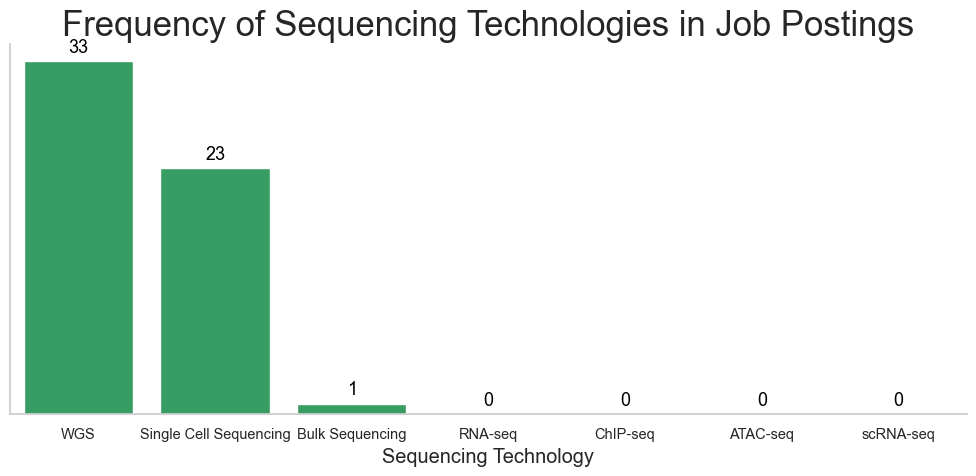

In [451]:
# List of specific sequencing technologies to check
sequencing_tech = ["RNA-seq", "ChIP-seq", "ATAC-seq", "scRNA-seq", "WGS", "Bulk Sequencing", "Single Cell Sequencing"]

# Initialize a dictionary to store the counts
sequencing_counts = {tech: 0 for tech in sequencing_tech}

# Count the mentions of each sequencing technology
for tech in sequencing_tech:
    # Check if the technology is mentioned in each job description
    sequencing_counts[tech] = df_final['tools_found'].apply(lambda tools: tech in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_sequencing_counts = sorted(sequencing_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted technologies and their counts
technologies, counts = zip(*sorted_sequencing_counts)

# Create a bar plot for sequencing technologies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(technologies), y=list(counts), color='#27ae61')
plt.title('Frequency of Sequencing Technologies in Job Postings')
plt.xlabel('Sequencing Technology')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=10.5)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

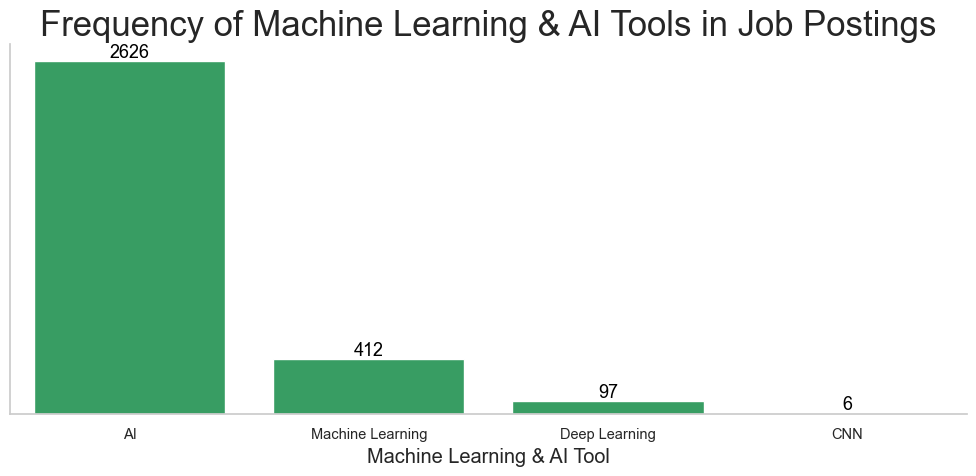

In [452]:
# List of specific machine learning and AI tools to check
ml_ai_tools = ['Machine Learning', 'Deep Learning', 'AI', 'CNN']

# Initialize a dictionary to store the counts
ml_ai_counts = {tool: 0 for tool in ml_ai_tools}

# Count the mentions of each machine learning and AI tool
for tool in ml_ai_tools:
    # Check if the tool is mentioned in each job description
    ml_ai_counts[tool] = df_final['tools_found'].apply(lambda tools: tool in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_ml_ai_counts = sorted(ml_ai_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted tools and their counts
tools, counts = zip(*sorted_ml_ai_counts)

# Create a bar plot for machine learning and AI tools
plt.figure(figsize=(10, 5))
sns.barplot(x=list(tools), y=list(counts), color='#27ae61')
plt.title('Frequency of Machine Learning & AI Tools in Job Postings')
plt.xlabel('Machine Learning & AI Tool')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=10.5)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

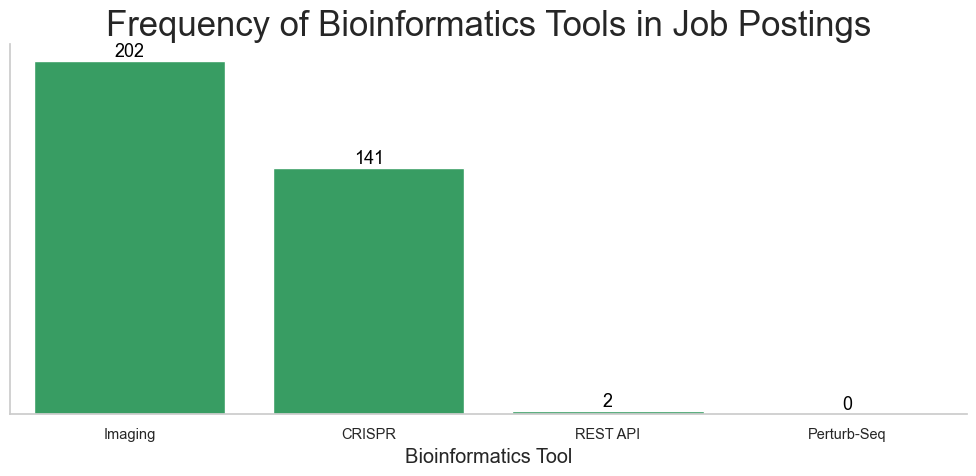

In [453]:
# List of specific bioinformatics tools to check
bioinformatics_tools = ['CRISPR', 'Perturb-Seq', 'Imaging', 'REST API']

# Initialize a dictionary to store the counts
bioinformatics_counts = {tool: 0 for tool in bioinformatics_tools}

# Count the mentions of each bioinformatics tool
for tool in bioinformatics_tools:
    # Check if the tool is mentioned in each job description
    bioinformatics_counts[tool] = df_final['tools_found'].apply(lambda tools: tool in tools).sum()

# Convert the counts dictionary to a sorted list of tuples
sorted_bioinformatics_counts = sorted(bioinformatics_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted tools and their counts
tools, counts = zip(*sorted_bioinformatics_counts)

# Create a bar plot for bioinformatics tools
plt.figure(figsize=(10, 5))
sns.barplot(x=list(tools), y=list(counts), color='#27ae61')
plt.title('Frequency of Bioinformatics Tools in Job Postings')
plt.xlabel('Bioinformatics Tool')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=10.5)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

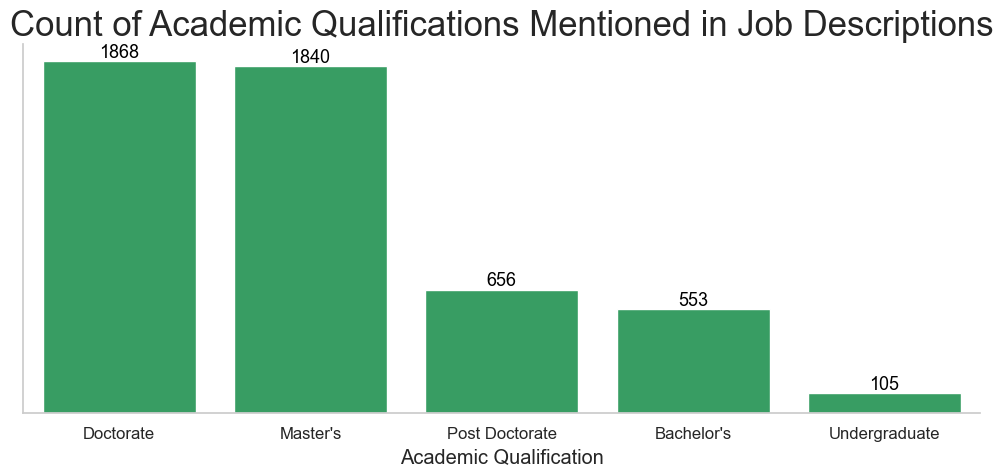

In [448]:
# Aggregate the academic qualifications
qualification_counts = df['academic_qualification'].explode().value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=qualification_counts.index, y=qualification_counts.values, color='#27ae61')
plt.title('Count of Academic Qualifications Mentioned in Job Descriptions')
plt.xlabel('Academic Qualification')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
annotate_bars(plt.gca(), orient='v', space=0.5, rotation=0, color='black', fmt='{:.0f}', fontsize=13)
plt.show()

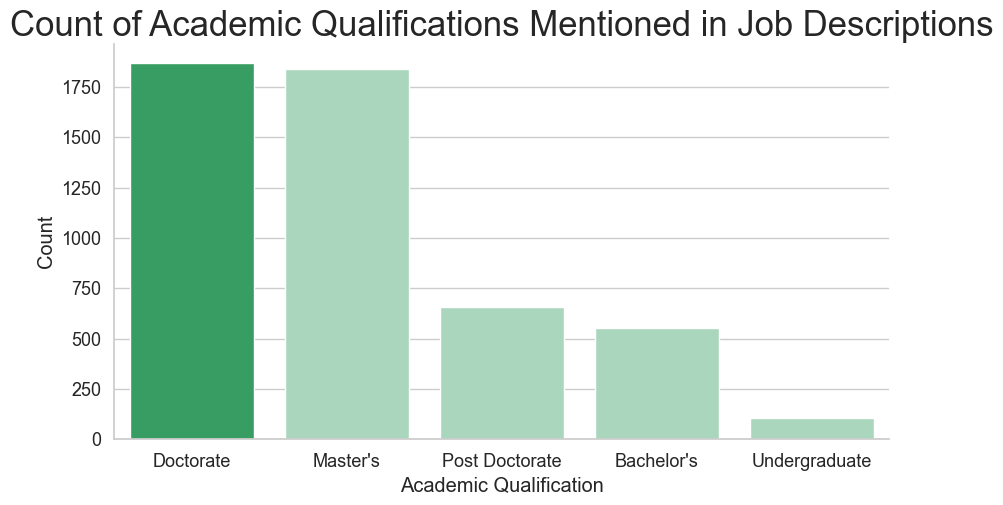

In [449]:


# Aggregate the academic qualifications
qualification_counts = df['academic_qualification'].explode().value_counts().sort_values(ascending=False)

# Identify the highest category
highest_category = qualification_counts.idxmax()

# Create a list of colors
base_color = '#27ae61'  # Emphasized color for the highest category
other_color = '#a4ddbd'  # Less important color for other categories

# Generate colors based on the category
colors = [base_color if category == highest_category else other_color for category in qualification_counts.index]

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=qualification_counts.index, y=qualification_counts.values, palette=colors)

# Setting the titles and labels
plt.title('Count of Academic Qualifications Mentioned in Job Descriptions')
plt.xlabel('Academic Qualification')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()
